## Step 1: Import the reaktoro Python package

In [1]:
from reaktoro import *

## Step 2: Specify the phases in the chemical system and their species

In [2]:
editor = ChemicalEditor()
editor.addAqueousPhaseWithElementsOf("H2O NaCl CaCO3 MgCO3")
editor.addGaseousPhase(["H2O(g)", "CO2(g)"])
editor.addMineralPhase("Calcite")
editor.addMineralPhase("Magnesite")
editor.addMineralPhase("Dolomite")
editor.addMineralPhase("Halite")

## Step 3: Define the kinetically-controlled reactions

In [3]:
editor.addMineralReaction("Calcite") \
    .setEquation("Calcite = Ca++ + CO3--") \
    .addMechanism("logk = -5.81 mol/(m2*s); Ea = 23.5 kJ/mol") \
    .addMechanism("logk = -0.30 mol/(m2*s); Ea = 14.4 kJ/mol; a[H+] = 1.0") \
    .setSpecificSurfaceArea(10, "cm2/g")

editor.addMineralReaction("Magnesite") \
    .setEquation("Magnesite = Mg++ + CO3--") \
    .addMechanism("logk = -9.34 mol/(m2*s); Ea = 23.5 kJ/mol") \
    .addMechanism("logk = -6.38 mol/(m2*s); Ea = 14.4 kJ/mol; a[H+] = 1.0") \
    .setSpecificSurfaceArea(10, "cm2/g")

editor.addMineralReaction("Dolomite") \
    .setEquation("Dolomite = Ca++ + Mg++ + 2*CO3--") \
    .addMechanism("logk = -7.53 mol/(m2*s); Ea = 52.2 kJ/mol") \
    .addMechanism("logk = -3.19 mol/(m2*s); Ea = 36.1 kJ/mol; a[H+] = 0.5") \
    .setSpecificSurfaceArea(10, "cm2/g")

## Step 4: Construct the chemical system

In [4]:
system = ChemicalSystem(editor)
reactions = ReactionSystem(editor)

## Step 5: Specify the equilibrium and kinetic species

In [5]:
partition = Partition(system)
partition.setKineticSpecies(["Calcite", "Magnesite", "Dolomite"])

## Step 6: Define the initial chemical equilibrium state

In [6]:
problem = EquilibriumProblem(system)
problem.setPartition(partition)
problem.setTemperature(60, "celsius")
problem.setPressure(100, "bar")
problem.add("H2O", 1, "kg")
problem.add("NaCl", 0.5, "mol")
problem.add("CO2", 1, "mol")

## Step 7: Calculate the initial chemical equilibrium state

In [7]:
state0 = equilibrate(problem)

## Step 8: Set the initial mass of the kinetic species

In [8]:
state0.setSpeciesMass("Calcite", 100, "g")
state0.setSpeciesMass("Dolomite", 50, "g")

## Step 9: Create a kinetic path solver

In [9]:
path = KineticPath(reactions)
path.setPartition(partition)

In [10]:
output = path.output()
output.filename("results.txt")
output.add("time(units=minute)")
output.add("pH")
output.add("elementMolality(Ca units=mmolal)", "Ca [mmolal]")
output.add("elementMolality(Mg units=mmolal)", "Mg [mmolal]")
output.add("phaseMass(Calcite units=g)", "Calcite [units=g]")
output.add("phaseMass(Dolomite units=g)", "Dolomite [units=g]")

## Step 11: Perform the kinetic path calculation

In [11]:
t0, t1 = 0.0, 25.0
path.solve(state0, t0, t1, "hours")

In [12]:
output.dict()

{'time(units=minute)': array([0.00000e+00, 2.25811e-06, 8.11963e-03, 3.60871e-02, 6.40545e-02,
        9.20219e-02, 1.37741e-01, 1.83460e-01, 2.56967e-01, 3.30474e-01,
        4.03981e-01, 4.77487e-01, 5.50994e-01, 6.24501e-01, 7.38037e-01,
        9.11300e-01, 1.20500e+00, 1.40548e+00, 1.60596e+00, 1.94397e+00,
        2.28197e+00, 2.61997e+00, 2.95797e+00, 3.29598e+00, 3.63398e+00,
        4.14792e+00, 4.66186e+00, 5.17580e+00, 5.68974e+00, 6.20368e+00,
        6.71762e+00, 7.23157e+00, 7.74551e+00, 8.11362e+00, 8.48174e+00,
        8.84986e+00, 9.21798e+00, 9.47709e+00, 9.73620e+00, 9.99530e+00,
        1.02544e+01, 1.05135e+01, 1.07726e+01, 1.10317e+01, 1.12908e+01,
        1.15499e+01, 1.18091e+01, 1.20682e+01, 1.23273e+01, 1.25864e+01,
        1.28455e+01, 1.31046e+01, 1.33637e+01, 1.36228e+01, 1.38819e+01,
        1.41410e+01, 1.44001e+01, 1.46592e+01, 1.49138e+01, 1.51683e+01,
        1.54229e+01, 1.56775e+01, 1.59320e+01, 1.63234e+01, 1.67148e+01,
        1.71062e+01, 1.74976e

## Step 12: Have fun!

In [13]:
import pandas as pd

In [14]:
df_results = output.DataFrame()

df_results

,time(units=minute),pH,Ca [mmolal],Mg [mmolal],Calcite [units=g],Dolomite [units=g]
0,0.000000,3.13656,6.000230e-17,5.000190e-17,100.0000,50.0000
1,0.000002,3.13656,9.732730e-06,5.476290e-07,100.0000,50.0000
2,0.008120,3.15023,3.394810e-02,1.938490e-03,99.9968,49.9996
3,0.036087,3.19430,1.436050e-01,8.395880e-03,99.9865,49.9985
4,0.064055,3.23455,2.448190e-01,1.458940e-02,99.9770,49.9973
...,...,...,...,...,...,...
130,1094.970000,4.95013,3.847510e+01,1.860090e+00,96.3380,49.6573
131,1192.410000,4.95113,3.860330e+01,1.831710e+00,96.3224,49.6625
132,1289.840000,4.95181,3.869030e+01,1.812830e+00,96.3118,49.6660
133,1387.280000,4.95227,3.874940e+01,1.800090e+00,96.3046,49.6683


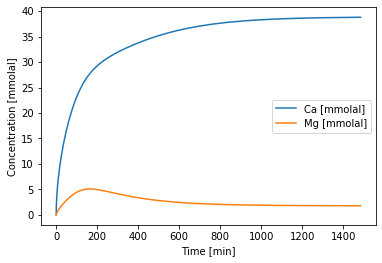

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x="time(units=minute)", y="Ca [mmolal]", data=df_results, label="Ca [mmolal]")
sns.lineplot(x="time(units=minute)", y="Mg [mmolal]", data=df_results, label="Mg [mmolal]")
plt.xlabel("Time [min]")
plt.ylabel("Concentration [mmolal]")
plt.legend()

plt.show()

In [16]:
state0.speciesAmounts()

array([3.00134300e-22, 8.56035826e-01, 2.01788914e-06, 5.77661112e-03,
       3.08064863e-02, 8.93518671e-06, 2.05598165e-03, 1.17744430e-04,
       2.70640797e-09, 4.76197711e-01, 5.80075801e-21, 3.22782947e-22,
       2.90434074e-22, 2.12596913e-22, 1.69943266e-05, 3.40428517e-22,
       5.54671249e+01, 3.68036098e-21, 7.50609127e-02, 5.97864788e-07,
       1.63741399e-19, 2.67503894e-22, 6.74812760e-22, 2.67391528e-04,
       1.41422691e-03, 1.37010483e-07, 1.07243120e-04, 1.03061958e-09,
       4.78597021e-01, 2.14029771e-02, 1.76566598e-09, 2.66858225e-14,
       1.31535701e-08, 7.48930186e-04, 1.03402930e-01, 9.62154993e-01,
       9.99990959e-11, 2.69359499e-01, 1.64629216e-21])

In [17]:
num_of_species = system.numSpecies()
for species_index in range(num_of_species):
    print(system.species()[species_index].name(), state0.speciesAmount(species_index))

CO(aq) 3.001343001796257e-22
CO2(aq) 0.8560358256062635
CO3-- 2.0178891415628484e-06
Ca(HCO3)+ 0.00577661111873367
Ca++ 0.030806486307018245
CaCO3(aq) 8.935186706244628e-06
CaCl+ 0.002055981654003492
CaCl2(aq) 0.00011774443007317395
CaOH+ 2.7064079745846202e-09
Cl- 0.4761977113852356
ClO- 5.800758010866725e-21
ClO2- 3.227829470768543e-22
ClO3- 2.9043407370557392e-22
ClO4- 2.125969126829123e-22
H+ 1.6994326617229685e-05
H2(aq) 3.4042851664875535e-22
H2O(l) 55.4671248685036
H2O2(aq) 3.680360984644366e-21
HCO3- 0.07506091270958197
HCl(aq) 5.978647878042006e-07
HClO(aq) 1.6374139930157824e-19
HClO2(aq) 2.6750389408263305e-22
HO2- 6.748127595162454e-22
Mg(HCO3)+ 0.00026739152791485627
Mg++ 0.0014142269051343232
MgCO3(aq) 1.3701048259191328e-07
MgCl+ 0.0001072431197807891
MgOH+ 1.0306195770573456e-09
Na+ 0.478597021118288
NaCl(aq) 0.021402977116045996
NaOH(aq) 1.7656659815013862e-09
O2(aq) 2.6685822470739775e-14
OH- 1.3153570053297993e-08
H2O(g) 0.0007489301864284924
CO2(g) 0.103402929948051

In [18]:
properties = state0.properties()
evaluate_pH = ChemicalProperty.pH(system)
pH = evaluate_pH(properties)

pH.val

4.952627628014553